In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Law of Large Numbers

<span id="LLN"></span>The Law of Large Numbers (LLN) stats that for i.i.d. random variables $Y^{(1)}, Y^{(2)}, \ldots$ with finite expectation $\mu:= \mathbb{E}(Y)$, the sample average

$$ S_n := \frac{1}{n} \sum_{i=1}^n Y^{(i)}$$
converges in some sense to $\mu$ as $n \rightarrow \infty.$ The **weak LLN states** that the convergence to $\mu$ is converge in **probability**; that is,
$$ \text{ for all  }\epsilon > 0, \quad \displaystyle \lim_{n \rightarrow \infty} \mathbb{P} (|S_n - \mu| > \epsilon) = 0.$$

The **strong LLN** states that the convergence is **almost sure** (also called *strong convergence*, *convergence with probability 1*, or *convergence almost everywhere*); that is,

$$ \mathbb{P} (\lim_{n \rightarrow \infty} S_n = \mu ) = 1. $$

In general, almost sure convergence implies convergence in probability, hence the adjectives "strong" versus "weak". For an overview of different types of convergence for random variables, see https://en.wikipedia.org/wiki/Convergence_of_random_variables. 

## Where Monte Carlo Can Fail


One of the essential assumptions of either law of large numbers (LLN) is that the random variables $Y^{(i)}$ have a **finite** common mean $\mu = \mathbb{E}(Y)$. 

Following Remark 9.16 in [[TJSUL]](https://link.springer.com/book/10.1007/978-3-319-23395-6), suppose we define the random variable
$$ Y = \frac{1}{a - X} $$

where 
* $ X \sim \mathcal{N}(0,1)$ and
* $ a \in \mathbb{R}$ is fixed.

Note that Y is almost surely finite (with respect to the measure induced by $X$); that is, (speaking plainly) $Y$ is finite at all but a single point. However, this is enough to make $\mathbb{E}_X(Y)$ is undefined: if $\mathbb{E}_X(Y)$ did exist, then the mapping $x \mapsto \frac{1}{a - x}$ would have to integrate over the real line to something finite.

**However, we can not determine if $\mathbb{E}(Y)$ exists simply by plotting the partial sums $S_n$ against the number of samples $n$.**

To see this conclusion illustrated, we'll plot $S_n$ against $n$ for different values of the (fixed) parameter $a$. Interestingly enough,for small values of $a$ (say $a = 2$), the Monte Carlo estimates $S_n$ of $\mathbb{E}_X(Y)$  are obviously poorly behaved. Seeing the below plot (for 10 independent MC runs), one would not be surprised to learn that  $\mathbb{E}_X(Y)$ does not exist.

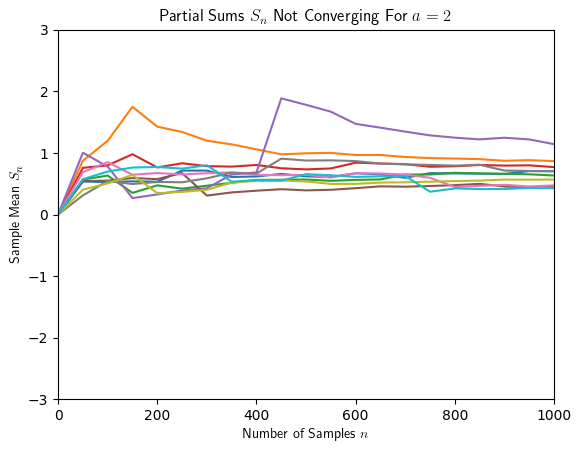

In [2]:
num_MC_runs = 10

for mc_run in range(num_MC_runs):
    S_n = []
    X = np.random.normal(0, 1, size = 1000)
    Y = 1/(2 - X)
    for i in range(0,1001,50):
        sum_total = sum(Y[:i])
        S_n.append(1/(i+1)*sum_total)
        
    sample_range = np.arange(0,1001,50)
    plt.plot(sample_range,S_n)
    plt.xlim([0,1000])
    plt.ylim([-3,3])
    plt.xlabel('Number of Samples $n$', usetex = True)
    plt.ylabel('Sample Mean $S_n$', usetex = True)
    plt.title("Partial Sums $S_n$ Not Converging For $a = 2$", usetex = True)

However, for larger $a$ values, the Monte Carlo average appears (but only *appears*) to converge to $\frac{1}{a}$, even though $\mathbb{E}_X(Y)$ still does not exist. We can see this for $a = 6$ in the two figures below. Their plots seem to converge toward $\frac{1}{a} \approx 0.1667$, especially when we zoom out. There is no qualitative difference between the $a = 2$ and $a = 6$ cases; that is, our interpretation technique for determining "convergence" is the same. However, by chance certain values of $a$ lead to an *incorrect* conclusion, meaning that just examining $S_n$ plots  is not a viable strategy overall. 

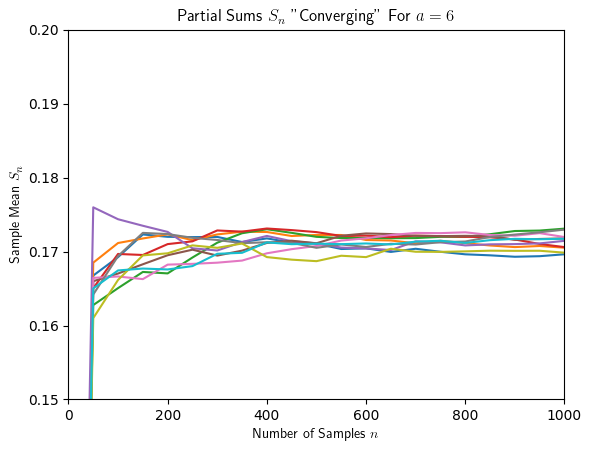

In [3]:
num_MC_runs = 10

for mc_run in range(num_MC_runs):
    S_n = []
    X = np.random.normal(0, 1, size = 1000)
    Y = 1/(6 - X)
    for i in range(0,1001,50):
        sum_total = sum(Y[:i])
        S_n.append(1/(i+1)*sum_total)
    plt.plot(sample_range,S_n)
    plt.xlabel('Number of Samples $n$', usetex = True)
    plt.ylabel('Sample Mean $S_n$', usetex = True)
    plt.title("Partial Sums $S_n$ \"Converging\" For $a = 6$", usetex = True)
    plt.xlim([0,1000])
    plt.ylim([.15,.2])

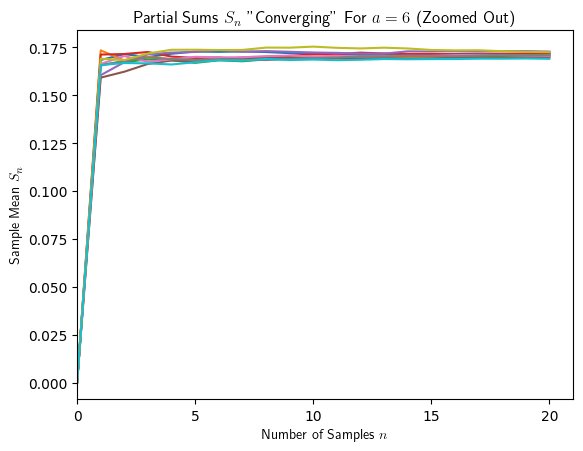

In [4]:
num_MC_runs = 10

for mc_run in range(num_MC_runs):
    S_n = []
    X = np.random.normal(0, 1, size = 1000)
    Y = 1/(6 - X)
    for i in range(0,1001,50):
        sum_total = sum(Y[:i])
        S_n.append([1/(i+1)*sum_total])
    plt.plot(S_n)
    plt.xlim([0,np.shape(S_n)[0]])
    plt.xlabel('Number of Samples $n$', usetex = True)
    plt.ylabel('Sample Mean $S_n$', usetex = True)
    plt.xticks(np.arange(0,21,5))
    plt.title("Partial Sums $S_n$ \"Converging\" For $a = 6$ (Zoomed Out)", usetex = True)

The heuristic? When we have random variables that involve ratios, we might run into trouble. Though this example is contrived, these types of issues actually happen all the time. For instance, *importance sampling*, which is a topic we will cover in this course (see Ch. 9 of [MC](#owen-MC)), involves estimating the quantity $\theta = \mathbb{E}(Y)/\mathbb{E}(X)$. This is problematic if we are using an approximation of the denominator $\mathbb{E}(X)$ that equals 0 with nonzero probability.

## References 

1. <span id="TJ-sul"></span> [[TJSUL]](https://link-springer-com.stanford.idm.oclc.org/book/10.1007/978-3-319-23395-6) T.J. Sullivan, <i>Introduction to Uncertainty Quantification</i>. Texts in Applied Mathematics (TAM) Springer series, vol. 63 (2015)

2. <span id="owen-mc"></span>[[MC]](https://statweb.stanford.edu/~owen/mc/) A. B. Owen, <i> Monte Carlo Theory, Methods, and Examples,</i> Chapter 2. Copyright Art Owen. (2013)